<div style="font-size:18px;"> <span style="color:purple">
Data Science 100 Final Project :D

Introduction:

There is a research group at UBC that is collecting data on how people play video games. They have collected data on players through a Minecreaft Server. They have presented us with many broad questions that we need to explore. The broad question that has been chosen for the project today is Which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. From this we have formulated a predictive question, the question we are trying to answer is: Can we predict the number of sessions players partake in a Minecraft server based on their age?

This project uses two datasets that were taken from the minecraft server, the two CSV files are:
players.csv (This dataset has information on the players)
sessions.csv(This dataset has specific information on the players sessions)

These two datasets were cleaned and joined together by hashedEmail to create a dataset that we used to answer our question. 


|**Variable Name**  | **Type** |**Description**                     |
|-------------------|----------|------------------------------------|
|hashedEmail        |Character |An identifier for each player       |
|Age                |Numeric   |The Age of the player in years      |
|Total_duration     |Numeric(Double)  |The total amount of time that a player spent on the Mincraft server in seconds|
|gender |Character | The self reported gender of the player  |
|num_session        |Integer|The total number of sessions played by the player|
|Experience|Character|The amount of experience that each player has|
|Subscribe|logical|Wheter the player is a subsriber to the Minecraft server|
|played_hours|Numeric(Double)|The time the player has spent on the Minecraft server in hours|
|name|character|What the player goes by|
|start_time|Character|The time the player started the Minecraft server in human readable time|
|end_time|Character|The time the player ended the Minecraft server in human readable time|
|original_start_time|Character|The time the player started the Minecraft server in the system time (seconds)|
|original_end_time|Character|The time the player ended the Minecraft server in the system time (seconds)|

**Important to note that not all the columns were used to answer our predictive question that we are trying to answer**

**Summary of the dataset used**

Number of Observation: 123 observations

The variables used in the analysis: Age, num_session

The response variable: num_session

The explanatory variable: Age

First we loaded all the necessary libraries that we need to run our project.

In [33]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In this step, we are reading and loading the players.csv file into R. 

In [2]:
players<-read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Now we also read and load in the sessions.csv file into the R program.

In [3]:
sessions<-read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**In this step we are wrangling and cleaning the data**

What is done here is that we have used the mutate function to create a session_duration column in our dataframe, this is done by using the original_end_time and the original_start_time. Right after we use the filter function, so that we are able to only include rows that contain hashedEmail and session_duration.

Once that has occurred, we now use the group_by function to group all the hashedEmail together and finally we use the summarize function to determine the number of sessions (we call it num_session) and the total_duration(by summing the session_duration). We call this new dataframe tidy_sessions. 

In [4]:
tidy_sessions<-sessions|>
mutate(session_duration = original_end_time - original_start_time)|>
filter(!is.na(hashedEmail), !is.na(session_duration))|>
group_by(hashedEmail)|>
summarize(num_session = n(), total_duration = sum(session_duration, na.rm = TRUE))
tidy_sessions

hashedEmail,num_session,total_duration
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,1e+07
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,0e+00
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,0e+00
⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,3e+08
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,0e+00
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,1e+07


In this step, we are now selecting the hashedEmail, gender and Age columns and then filtering for rows that have Age and no NA values. We use the semi_join function to assure that rows with hashedEmail that are present in the tidy_sessions dataframe are kept. We name the object tidy_players.  

In [5]:
tidy_players<-players|>
select(hashedEmail, gender, Age)|>
filter(!is.na(Age))|>
semi_join(tidy_sessions, by = "hashedEmail")
tidy_players

hashedEmail,gender,Age
<chr>,<chr>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17
⋮,⋮,⋮
71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,Male,22
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17


Next, we use inner_join on the tidy_sessions data and use that to merge the tidy_sessions and tidy_players into one dataframe. We name the object player_session. 

In [6]:
player_session<-tidy_players|>
inner_join(tidy_sessions, by = "hashedEmail")
player_session

hashedEmail,gender,Age,num_session,total_duration
<chr>,<chr>,<dbl>,<int>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,Male,9,27,1.2e+08
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,Male,17,3,1.0e+07
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,Male,17,1,0.0e+00
⋮,⋮,⋮,⋮,⋮
71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,Male,22,1,0
d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,Prefer not to say,17,1,0
f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,Male,17,6,0


Now in this step, we are using the group_by function so that we group together the Age column and then summarize right after to calculate the mean of the num_session. We call this new column avg_session. We call the object of this step avg_player_session. 

In [37]:
avg_player_session<-player_session|>
group_by(Age)|>
summarize(avg_session = mean(num_session))
avg_player_session

Age,avg_session
<dbl>,<dbl>
8,1
9,27
10,7
⋮,⋮
45,1
49,16
50,1


In this step, we are going to create a scatterplot so that we can plot the Age and avg_session. We will put Age on the x-axis and avg_session on the y-xis. This graph allows for us to visualize the average sessions that are played by players based on their ages. 

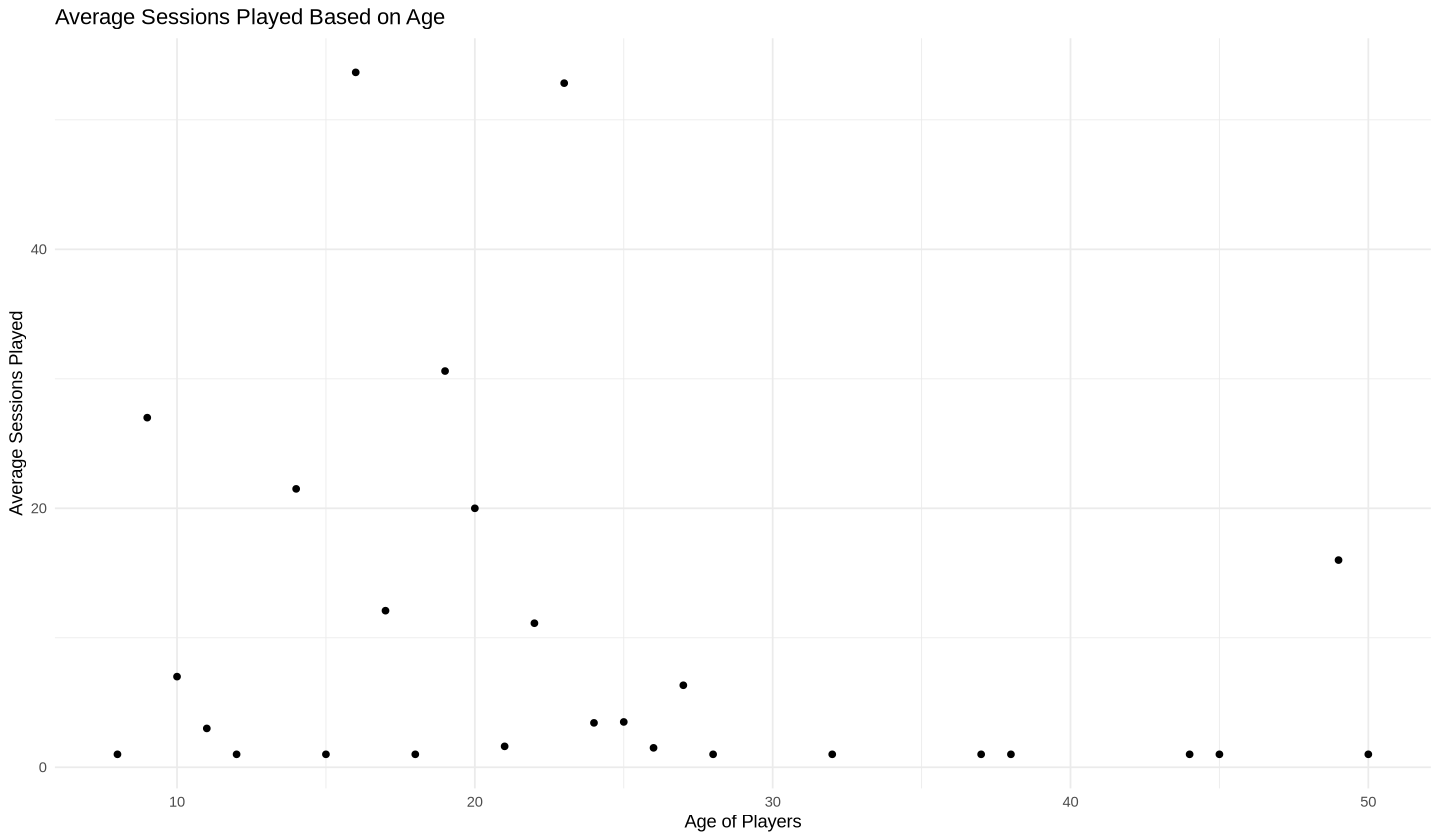

In [64]:
library(ggplot2)

options(repr.plot.width=12, repr.plot.height=7)
game_plot_1<-avg_player_session|>
ggplot(aes(x = Age, y = avg_session))+
geom_point(alpha = 1)+
labs(title = "Average Sessions Played Based on Age", x = "Age of Players", y = "Average Sessions Played")+
theme_minimal()
game_plot_1

Figure 1: Scatterplot of Age Vs Average Sessions played

From figure 1, we can see that our data points are fairly spread around and that average sessions does not really indicate an increase or decrease as age increases. 

Now, we are going to move on to the analysis portion of the project. For the data analysis, we have decided to use the linear regression model. The reason we have decided to use this method is because we have a continuous response and explanatory variable. These are numerical variables, so first of all it makes sense for us to use regression. Linear regression allows for us to interpret the data and easily predict how the number of sessions could possibly change with age. 

Before we started linear regression, we have to assume that the relationship between age and number of sessions would be linear (later, we see that is not really the case). We also need to consider the weaknesses of linear regression. We need to understand that when we plot, the relationship could be not linear, then linear regression will not demonstrate it that well. It is also crucial to consider any outliers in the data, which could affect the line of best fit to be altered. 

The reason I chose linear regression was because it seemed like a straightforward model to determine the relationship between age and number of sessions. 

Now, we are first going to use the initial_split function, so that we can split our player_session dataset into a training and testing set. In the initial_split function, we have decided to use 85% of the data and are splitting based on the num_session. We name the training set game_training and the testing set as game_testing. 

In [48]:
game_split<-initial_split(player_session, prop = 0.85, strata = num_session)
game_training<-training(game_split)
game_testing<-testing(game_split)
game_split

<Training/Testing/Total>
<103/20/123>

Right after, we are going to set up a linear regression specification model. We use the linear_reg function to do this and we set_engine as "lm" to indicate we are using the linear regression engine and then we use set_mode to set as a "regression" classification, so that we know that we are doing a regression problem. We name our object lm_spec. 

In [42]:
lm_spec<-linear_reg()|>
set_engine("lm")|>
set_mode("regression")
lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


Now, we are going to create a recipe and workflow, so that we can preprocess and combine the data together. We first use the recipe function and set our response variable as num_sessions and our predictor variable as Age. We also specify that we are using the game_training set. We name the object for the recipe, lm_recipe. 

Then, we create a workflow to combine our recipe and model together. At the end of the workflow, we use the fit function to fit our data on the game_training dataset. We name the workflow object as lm_fit. 

In [43]:
lm_recipe<-recipe(num_session ~ Age, data = game_training)

lm_fit<-workflow()|>
add_recipe(lm_recipe)|>
add_model(lm_spec)|>
fit(data = game_training)
lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
    18.6936      -0.2928  


In this step of our analysis, we are going to make predictions and add those predictions to our game_training dataset. This is done by using our lm_fit data and using the predict funtion on the game_training dataset. Then we use the bind_cols function to attach our predictions on to game_training dataset. We name the object game_preds. 

Right after, we are going to create a scatter plot. We will set Age on our x-axis and num_session on our y-axis. From there, we also use the geom_line function to show our linear line here. We make the x variable of the line as Age and the y-variable as .pred. Then we decide to color the line, blue. We then give descriptive axis titles and a title for the graph. We name the plot object as lm_predictions_plot. This plot is used to assess the model's fit and to see if it is a good representation of the data. (We use coord_cartesian to zoom in on most relevant range of the ages and the number of sessions). 

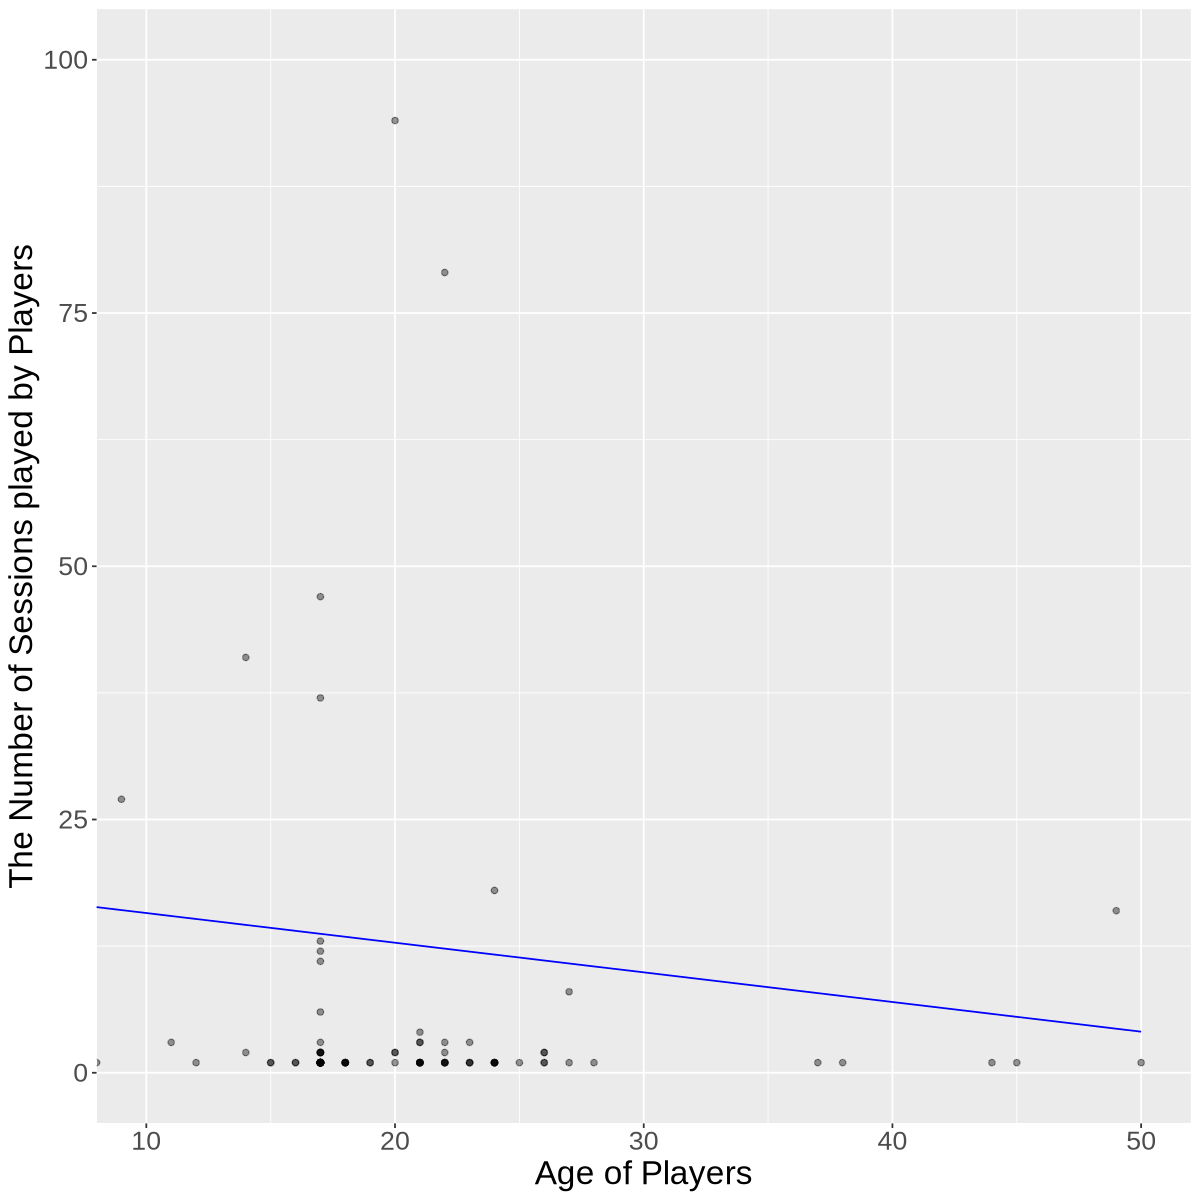

In [62]:
options(repr.plot.width = 10, repr.plot.height = 10)
game_preds<-lm_fit|>
predict(game_training)|>
bind_cols(game_training)

lm_predictions_plot<-game_preds|>
ggplot(aes(x = Age, y = num_session))+
geom_point(alpha = 0.4)+
coord_cartesian(xlim = c(10, 50), ylim = c(0, 100)) +
geom_line(mapping = aes(x = Age, y = .pred), 
            color = "blue") +
        xlab("Age of Players") +
        ylab("The Number of Sessions played by Players") +
        theme(text = element_text(size = 20))
lm_predictions_plot

Figure 2: Scatterplot and line of best-fit with the training data that shows Age Vs. The number of sessions played by players

In figure 2, we see that our line of best-fit does not really seem to go through our data points. This indicates to us that the relationship when we try it on our training data is not very strong. There also does not seem to be an obvious relationship between age and number of sessions here. 

Now we are going to see how well our linear regression model works on our testing set. We use the predict function here on the game_testing data and apply our lm_fit to make our predictions. We then use the bind_cols to attach our predictions to our game_testing dataframe. Right after that, we use the metrics function to compute the RMSE. We set our truth variable as num_session, which is our actual data and our estimate as .pred, which is where we made our predictions. We name our object here lm_test_results. 

Then, we are going to use the filter function to do the .metric=="rmse", and the select function to get the rmse from the .estimate coumn and then the pull function to pull out the RMSE value that we need. 

In [45]:
lm_test_results <- lm_fit |>
                    predict(game_testing) |>
                    bind_cols(game_testing) |>
                    metrics(truth = num_session, estimate = .pred)                    

lm_rmspe <- lm_test_results |>
                filter(.metric == 'rmse') |>
                select(.estimate) |>
                pull()
lm_rmspe

[1] 28.70824

Finally, we are going to create a visualization of linear regression model on our test data. We create predictions again using our game_testing data and using the lm_fit data that created. We then use the bind_cols to add our prediction to the game_testing dataframe. We name the object test_preds. We do this step again because this time, we don't need to predict the RMSE, just the predictions. 

Now we create a plot to see how well our linear regression model works on data that has not been seen yet. We create a scatterplot where we set Age as the x-axis and the num_session on the y-axis. We then use the geom_line function to add in our best-fit line which is created by the x-variable (Age) and y-variable (num_session) and we color the line a blue colour. We then set descriptive labels and a title for our graph. We name our plot, lm_predictions_test_plot (Y-axis shown on log scale to better visualize session frequency distribution.) (geom_jitter is also used because the points were overlapping way too much). 

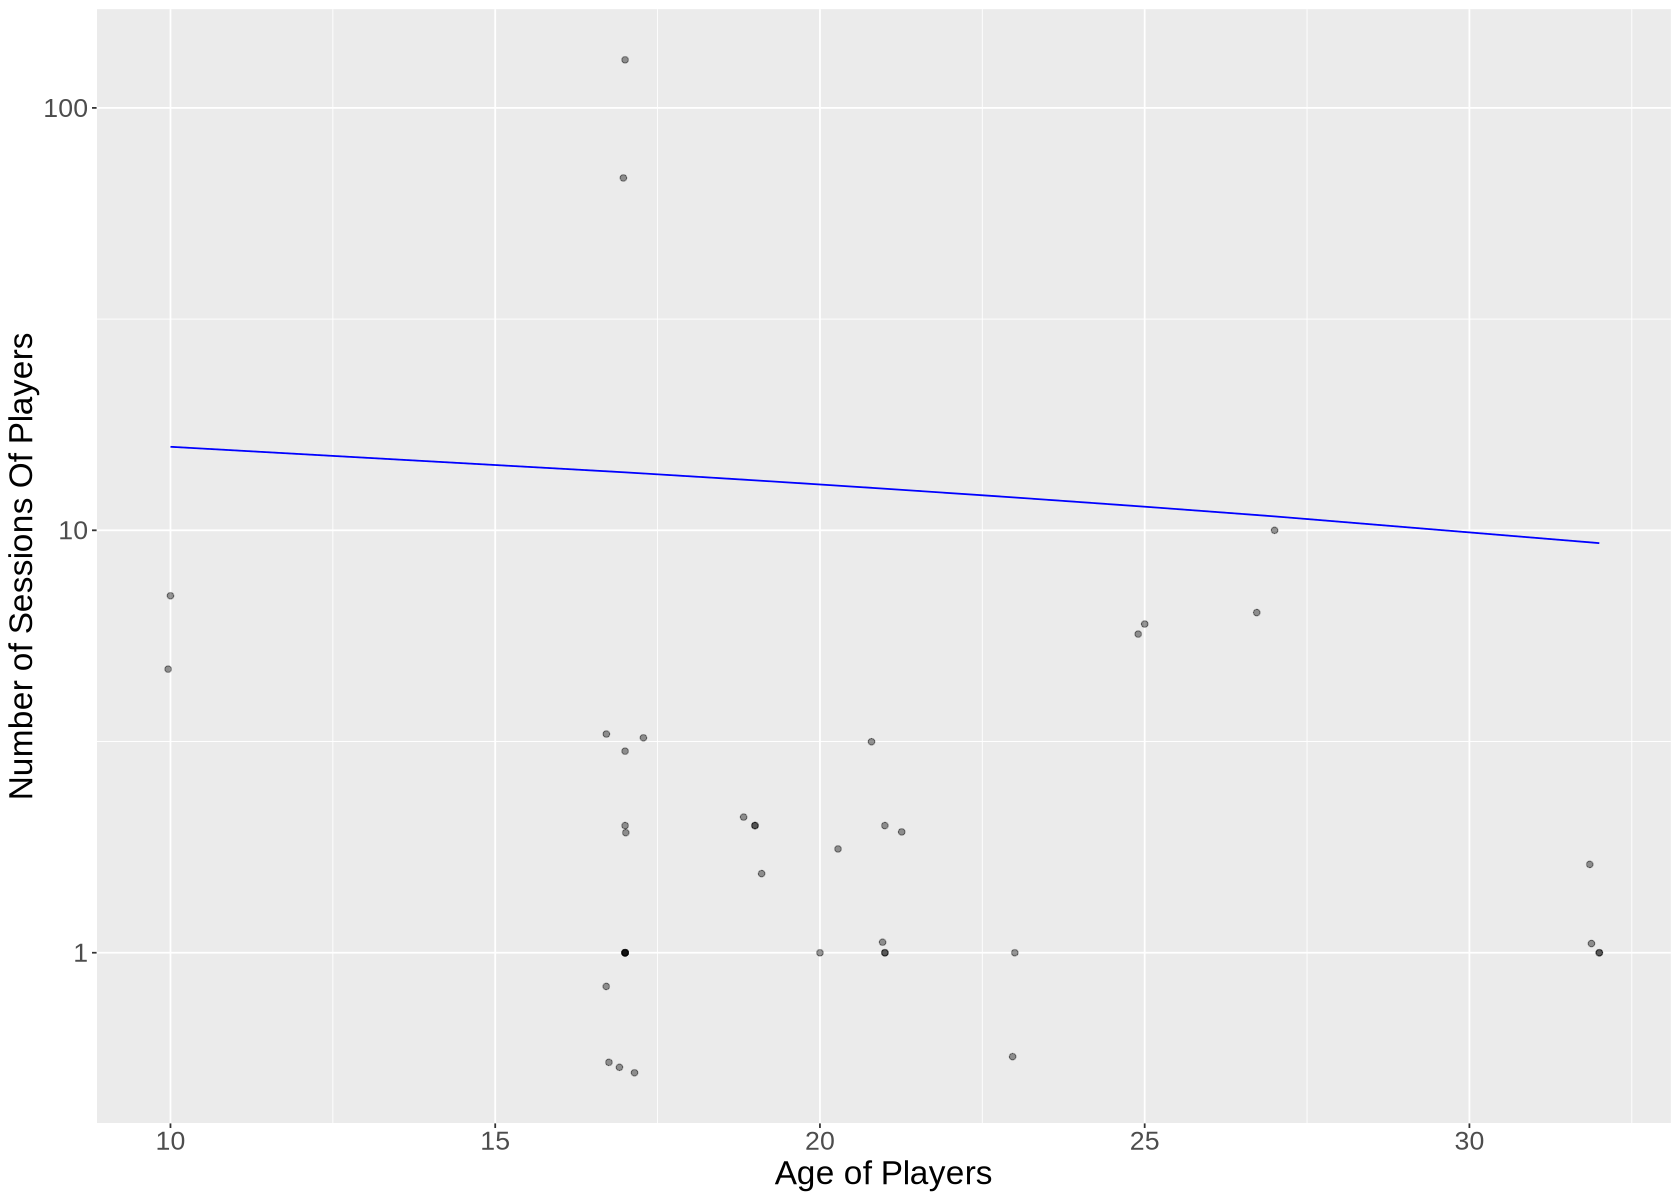

In [66]:
options(repr.plot.width = 14, repr.plot.height = 10)


test_preds <- lm_fit |>
    predict(game_testing) |>
    bind_cols(game_testing)

lm_predictions_test_plot <- test_preds |>
    ggplot(aes(x = Age, y = num_session)) +
        geom_point(alpha = 0.4) +
geom_jitter(alpha = 0.4, width = 0.3, height = 0.3) +
        geom_line(
            mapping = aes(x = Age, y = .pred), 
            color = "blue") +
  scale_y_log10() +
        xlab("Age of Players") +
        ylab("Number of Sessions Of Players") +
        theme(text = element_text(size = 20))
lm_predictions_test_plot

Figure 3: This is a scatterplot with a line of best-fit that was created by our testing data. This plot shows Age Vs. the number of sessions by players. 

In figure 3, we also see that the line of best-fit does not go through the the data points. This again suggests that relationship for the testing data is also not strong. The relationship bewteen age and number of sessions also seem to be very weak here. 

**Discussion**
From the plots and the data analysis that we have done, we were able to calculate the RMSE from linear regression, as well as see how our linear regression model acts on the training set of data and unseen data (testing set). When creating the recipe and fitting our model in the workflow, we get our equation of the line. Our equation of line is num_sessions = 18.6936 - 0.2928 * Age. The intercept (18.6936) is the predicted number of sessions for a player with an age = 0. The slope (-0.2928) indicates to us that in each additional year of age, the predicted number of sessions decreases by a value of around 0.29. This indicates to us that older indivdiuals tend to have less sessions compared to younger individuals. This equation indicates to use that age and number of sessions have a slight negative relationship. This could suggest to us that younger players tend to have more sessions and be more active on the minecraft server. 

My number of sessions seem to range from 0 to 100 sessions. My calculated RMSE value was 28.7. This indicates how off my number of sessions are from the actual number of sessions that occur. This seems to be a pretty big error and this could indicate that only age might not be a strong predictor for how many sessions a player tends to play. This could indicate that the relationship between age and num_session might just be very weak, which is why we are seeing a large RMSE. This might indicate that other variables other than age might play a bigger role in determining the number of sessions. This could also explain why when we look at the plots, our line of best-fit does not seem to go through the data points. The model is trying to find something to minimize error, however it leads to a trend not being followed. 

This outcome was a little expected because it makes sense that not only age wil affect the number of sessions by players. There can be many other variables like lifestyle, personality, etc that could have a greater effect on the number of sessions. We did see a weak relationship, so it could have some effect, but we can see that it does not have a large effect. Now we know that the relationship between age and number of sessions is fairly weak, this opens up space for questions that can explore other variables, such as can someone's past experiences in a game lead to a greater number of sessions? Or, we can also test gender to see if that would have an effect on the number of sessions one partakes in. The impact of these findings is that now that we know age is not a strong predictor for number of sessions, we know that using promotional techniques to promote the Minecraft server to target certain age groups would not be that effective due to the data we have seen today. This indicates to game developers that we need to use non-age based promotional techniques instead. 